In [1]:
# Dependencies and Setup
import json 
import requests
import pandas as pd
from Resources.config import api_key
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#Load the csv file created in the data cleaning code into a Pandas DataFrame
college_analysis_df = pd.read_csv("Output/School_Summary2.csv")

#Display sample data
college_analysis_df


,Unnamed: 0,index,School Name,School City,Institution Type,Total Students,% Male Students,% Female Students,% Caucasian Student,% African American Student,...,Retention Rate,Share of Student Received Pell Grant,Overall Completion Rate,Completion rate of Caucasian Student,Completion rate of African American Student,Completion rate of Hispanic Student,Completion rate of Asian Student,Completion rate of American Indian_Alaska Native Student,Completion rate of Two or More Races Student,Completion rate of Non Resident Alien Student
0,0,4,Bemidji State University,Bemidji,Public,3508.0,0.4265,0.5735,0.8093,0.0282,...,0.6728,0.508545,0.4759,0.4914,0.3000,0.2857,0.3333,0.3750,0.2963,0.5333
1,1,22,University of Minnesota-Crookston,Crookston,Public,1574.0,0.4320,0.5680,0.7541,0.0476,...,0.6973,0.515744,0.5604,0.6144,0.2500,0.3846,0.7500,0.0000,0.4286,0.6000
2,2,26,University of Minnesota-Duluth,Duluth,Public,8084.0,0.5146,0.4854,0.8365,0.0241,...,0.7731,0.379805,0.6467,0.6698,0.5818,0.3833,0.5256,0.5000,0.5094,0.5556
3,3,27,The College of Saint Scholastica,Duluth,Private nonprofit,2134.0,0.3074,0.6926,0.8102,0.0450,...,0.8121,0.440576,0.6516,0.6758,0.3333,0.6471,0.6250,0.0000,0.3913,0.6667
4,4,43,Minnesota State University-Mankato,Mankato,Public,11500.0,0.4637,0.5363,0.7176,0.0607,...,0.7470,0.457731,0.5183,0.5462,0.3063,0.3984,0.4057,0.5000,0.4318,0.5577
5,5,47,Augsburg University,Minneapolis,Private nonprofit,2346.0,0.4420,0.5580,0.4054,0.2340,...,0.6935,0.645589,0.5807,0.6216,0.4921,0.5135,0.6364,0.3000,0.7778,0.6667
6,6,49,University of Minnesota-Twin Cities,Minneapolis,Public,30734.0,0.4603,0.5397,0.6284,0.0712,...,0.9152,0.415638,0.8421,0.8501,0.7200,0.7681,0.8621,1.0000,0.8051,0.8521
7,7,50,Minneapolis College of Art and Design,Minneapolis,Private nonprofit,667.0,0.3148,0.6852,0.6447,0.0645,...,0.7662,0.501292,0.6621,0.6735,0.7500,0.6667,0.4286,1.0000,0.6250,0.5000
8,8,59,Concordia College at Moorhead,Moorhead,Private nonprofit,1862.0,0.4441,0.5559,0.7889,0.0338,...,0.8173,0.319328,0.7423,0.7577,0.4545,0.7143,0.4545,1.0000,0.6667,0.8750
9,9,60,Minnesota State University Moorhead,Moorhead,Public,3778.0,0.3780,0.6220,0.8086,0.0492,...,0.6872,0.464684,0.5692,0.6106,0.4545,0.4737,0.7000,0.0000,0.2727,0.5000


In [3]:
# separate private vs. public

private_schools = college_analysis_df[college_analysis_df["Institution Type"] == "Private nonprofit"]
public_schools = college_analysis_df[college_analysis_df["Institution Type"] == "Public"]

In [4]:
# calculate the average retention rate
private_retention_rate = private_schools["Retention Rate"].mean()
public_retention_rate = public_schools["Retention Rate"].mean()

In [5]:
# print results
print("Average Retention Rate for Private Schools:", private_retention_rate)
print("Average Retention Rate for Public Schools:", public_retention_rate)

Average Retention Rate for Private Schools: 0.8116
Average Retention Rate for Public Schools: 0.7385666666666667


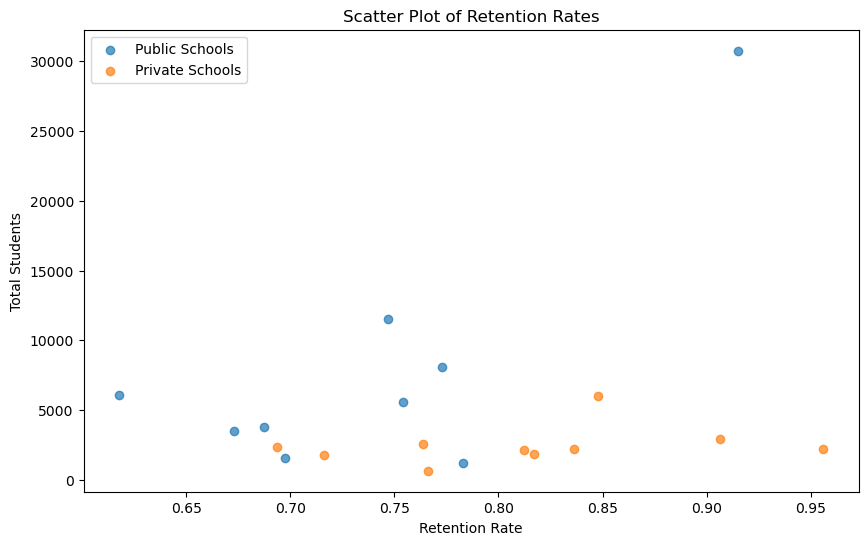

<Figure size 640x480 with 0 Axes>

In [13]:
#create scatterplot
plt.figure(figsize=(10, 6))

plt.scatter(college_analysis_df[college_analysis_df["Institution Type"] == "Public"]["Retention Rate"],
            college_analysis_df[college_analysis_df["Institution Type"] == "Public"]["Total Students"],
            label= "Public Schools", alpha=0.7)

plt.scatter(college_analysis_df[college_analysis_df["Institution Type"] == "Private nonprofit"]["Retention Rate"],
            college_analysis_df[college_analysis_df["Institution Type"] == "Private nonprofit"]["Total Students"],
            label= "Private Schools", alpha=0.7)

# add labels and title
plt.xlabel("Retention Rate")
plt.ylabel("Total Students")
plt.title("Scatter Plot of Retention Rates")

plt.legend()

plt.show()

#saving images
folder_path = "Resources"
file_path = f"{folder_path}/scatterplot_retention_rates.png"

plt.savefig(file_path)

In [7]:
college_analysis_df.columns

Index(['Unnamed: 0', 'index', 'School Name', 'School City', 'Institution Type',
       'Total Students', '% Male Students', '% Female Students',
       '% Caucasian Student', '% African American Student',
       '% Hispanic Student', '% Asian Student',
       '% American Indian and Alaska Native Student',
       '% Native Hawaiian and Pacific Islander Student',
       '% Two or More Race Student', '% Non Resident Alien Student',
       '% Unknown Student', 'Retention Rate',
       'Share of Student Received Pell Grant', 'Overall Completion Rate',
       'Completion rate of Caucasian Student',
       'Completion rate of African American Student',
       'Completion rate of Hispanic Student',
       'Completion rate of Asian Student',
       'Completion rate of American Indian_Alaska Native Student',
       'Completion rate of Two or More Races Student',
       'Completion rate of Non Resident Alien Student'],
      dtype='object')

In [8]:
# List of ethnicities to consider
ethnicities = ["% Caucasian Student", "% African American Student", "% Hispanic Student", 
               "% Asian Student", "% American Indian and Alaska Native Student", 
               "% Two or More Race Student", "% Non Resident Alien Student"]

# Calculate the average completion rate for each ethnicity
avg_completion_rates = []
for ethnicity in ethnicities:
    avg_rate = college_analysis_df[ethnicity].mean()
    avg_completion_rates.append(avg_rate)


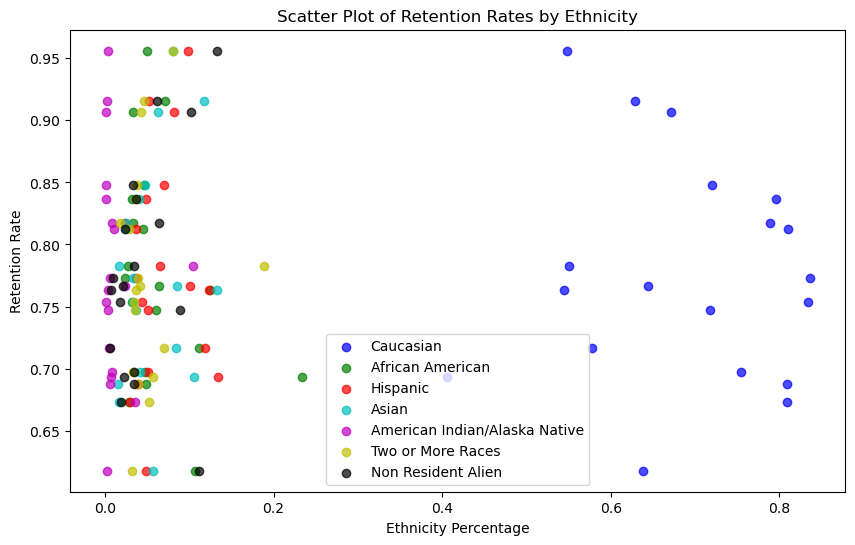

<Figure size 640x480 with 0 Axes>

In [12]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# List of ethnicities to consider
ethnicities = ["% Caucasian Student", "% African American Student", "% Hispanic Student", 
               "% Asian Student", "% American Indian and Alaska Native Student", 
               "% Two or More Race Student", "% Non Resident Alien Student"]

# Assign colors for different ethnicities
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Loop through each ethnicity and create a scatter plot
for i, ethnicity in enumerate(ethnicities):
    plt.scatter(college_analysis_df[ethnicity], college_analysis_df["Retention Rate"], label=ethnicity, alpha=0.7, color=colors[i])

# Add labels and title
plt.xlabel("Ethnicity Percentage")
plt.ylabel("Retention Rate")
plt.title("Scatter Plot of Retention Rates by Ethnicity")

legend_labels = ["Caucasian", "African American", "Hispanic", "Asian", 
                 "American Indian/Alaska Native", "Two or More Races", "Non Resident Alien"]

# Add legend
plt.legend(legend_labels)

# Show the plot
plt.show()

#saving images
folder_path = "Resources"
file_path = f"{folder_path}/retention_rates_by_ethnicity.png"

plt.savefig(file_path)

In [ ]:
# Create a box plot
plt.figure(figsize=(6, 4))

# Data for box plot
public_completion = college_analysis_df[college_analysis_df["Institution Type"] == "Public"]["Overall Completion Rate"]
private_completion = college_analysis_df[college_analysis_df["Institution Type"] == "Private nonprofit"]["Overall Completion Rate"]

plt.boxplot([public_completion, private_completion], labels=['Public', 'Private'])

# Add labels and title
plt.xlabel("School Type")
plt.ylabel("Completion Rate")
plt.title("Completion Rate Comparison: Public vs Private Schools")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Completion rates for public and private schools
public_completion = college_analysis_df[college_analysis_df["Institution Type"] == "Public"]["Overall Completion Rate"]
private_completion = college_analysis_df[college_analysis_df["Institution Type"] == "Private nonprofit"]["Overall Completion Rate"]

# Two-sample t-test
t_statistic, p_value = st.ttest_ind(public_completion, private_completion)

# Significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in completion rates.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in completion rates.")


In [ ]:
print("The p_value representing the correlation between completion rates for public and private schools is:")
print (p_value)

In [ ]:
# Calculate the Pearson correlation coefficient
correlation = college_analysis_df["Retention Rate"].corr(college_analysis_df["Overall Completion Rate"])

# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="Retention Rate", y="Overall Completion Rate", data=data, scatter_kws={'alpha':0.5})
plt.xlabel("Retention Rate")
plt.ylabel("Overall Completion Rate")
plt.title("Correlation between Retention Rate and Completion Rate")
plt.text(0.2, 0.7, f"Pearson Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()
